### Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import re
import nltk
from nltk import ngrams
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

### Preprocess Reviews

In [ ]:
def preprocess(raw_text):
    stop = set(stopwords.words('english'))

    letters_only_text = re.sub('R[^:]+: ', '', raw_text)

    letters_only_text = " ".join(filter(lambda x:x[0]!='@', letters_only_text.split()))

    letters_only_text = re.sub("[^a-zA-Z]", " ", letters_only_text)

    words = letters_only_text.lower().split()

    ps=PorterStemmer()
    lm = WordNetLemmatizer()

    meaningful_words = [lm.lemmatize(w) for w in words if w not in stop]

    cleaned_word_list = " ".join(meaningful_words)

    return cleaned_word_list

#### Create Word Cloud

In [25]:
mpl.rcParams['font.size'] = 12 
plt.figure(figsize=(15,10))

stopwords = set(STOPWORDS)

def word__cloud(text):
    data = ' '.join(text.tolist())


    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=2000, width=2000, height=800).generate(data)

    print(wordcloud)
    plt.figure(figsize=(20, 20))
    plt.imshow(wordcloud)
    
    plt.axis('off')
    plt.show()

<Figure size 1080x720 with 0 Axes>

#### Create Corpus Data

In [ ]:
def create_corpus(text):
  review_corpus = text.values.tolist()
  corpus = [word for i in review_corpus for word in i.split()]
  return corpus

In [ ]:
def count_frequency(corpus):
  frequency = {}

  for item in corpus:
    # checking the element in dictionary
    if item in frequency:
        # incrementing the counr
        frequency[item] += 1
    else:
        # initializing the count
        frequency[item] = 1
  return frequency

#### Graph for displaying N-Grams

In [47]:
def create_n_grams(text, n):
  df_data_pos = " ".join(text)
  bigrams_pos = ngrams(word_tokenize(df_data_pos), n)
  frequency_pos = Counter(bigrams_pos)
  df_pos = pd.DataFrame(frequency_pos.most_common(20))
  plt.figure(figsize=(20, 12))

  # Barplot that shows the top 20 Bigrams
  sns_pos_2 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'blue')
  # Setting axes labels
  sns_pos_2.set(xlabel = 'Occurrence', ylabel = str(n) + '-grams', title = 'Top 20 ' + str(n) + 'grams for all Reviews');
  plt.show()

#### Required dependencies

In [20]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
df = pd.read_csv('./data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,12,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
processed = pd.DataFrame(df['text'].apply(preprocess))
processed

,text
0,must unshackle ai boundary human knowledge nlp...
1,boston dynamic robot evolution ai artificialin...
2,intro python computer science data science lea...
3,blue nova technology llc bnt men polo black li...
4,hidata engineer open location remote http co z...
...,...
17036,little superm friend huh http co ulykyztkch
17037,folk aragorn year old helped hobbit get rid ri...
17038,sadly guarantee khan win entered late build fo...
17039,monica morrow lot press deserves flower spoke ...


In [23]:
polarity = []
subjectivity = []
for tweet in processed['text']:
    print(tweet)
    #Step 4 Perform Sentiment Analysis on Tweets
    analysis = TextBlob(tweet)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)

Streaming output truncated to the last 5000 lines.
thankyou follower late ill raffle post first place get animation loop secon
thought mine late stimulus late nothing make sense anymore
overdraft fee industry billion year check cashing industry billion year pay day loan industry billion
late party really nervous coming superstraight thought http co mbyxukdfaq
finally free time late congrats k http co mgalucctb
http co ibnftxss http co hhfnnmdjum
late join fun simply tweet conquered time today count get befo http co v wrvlub r
fine late afternoon walk paddle malc fewston reservoir yorkshire walkshire leica http co dhdkpcx
reading early bitcoin know imagine thinking late amzn tra
take year life stop taking crazy knee elbow w http co flowue ng
came back late take ohio state columbus catch action http co zq c
ranwan bingqiu changgu hualian right
finally free time late congrats k http co mgalucctb
anything learned year never late good day productive one comforting one
hiring click apply cus

In [24]:
processed['subjectivity'] = subjectivity
processed['polarity'] = polarity
processed

,text,subjectivity,polarity
0,must unshackle ai boundary human knowledge nlp...,0.100000,0.000000e+00
1,boston dynamic robot evolution ai artificialin...,0.166667,0.000000e+00
2,intro python computer science data science lea...,0.100000,0.000000e+00
3,blue nova technology llc bnt men polo black li...,0.266667,-8.333333e-02
4,hidata engineer open location remote http co z...,0.350000,-5.000000e-02
...,...,...,...
17036,little superm friend huh http co ulykyztkch,0.500000,-1.875000e-01
17037,folk aragorn year old helped hobbit get rid ri...,0.400000,1.250000e-01
17038,sadly guarantee khan win entered late build fo...,0.525000,1.387779e-17
17039,monica morrow lot press deserves flower spoke ...,0.000000,0.000000e+00


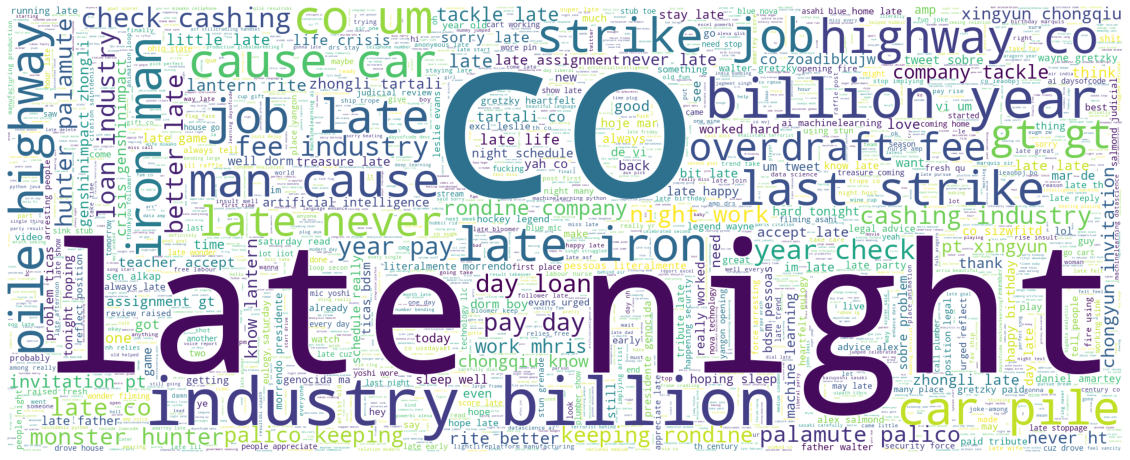

In [26]:
word__cloud(processed['text'])

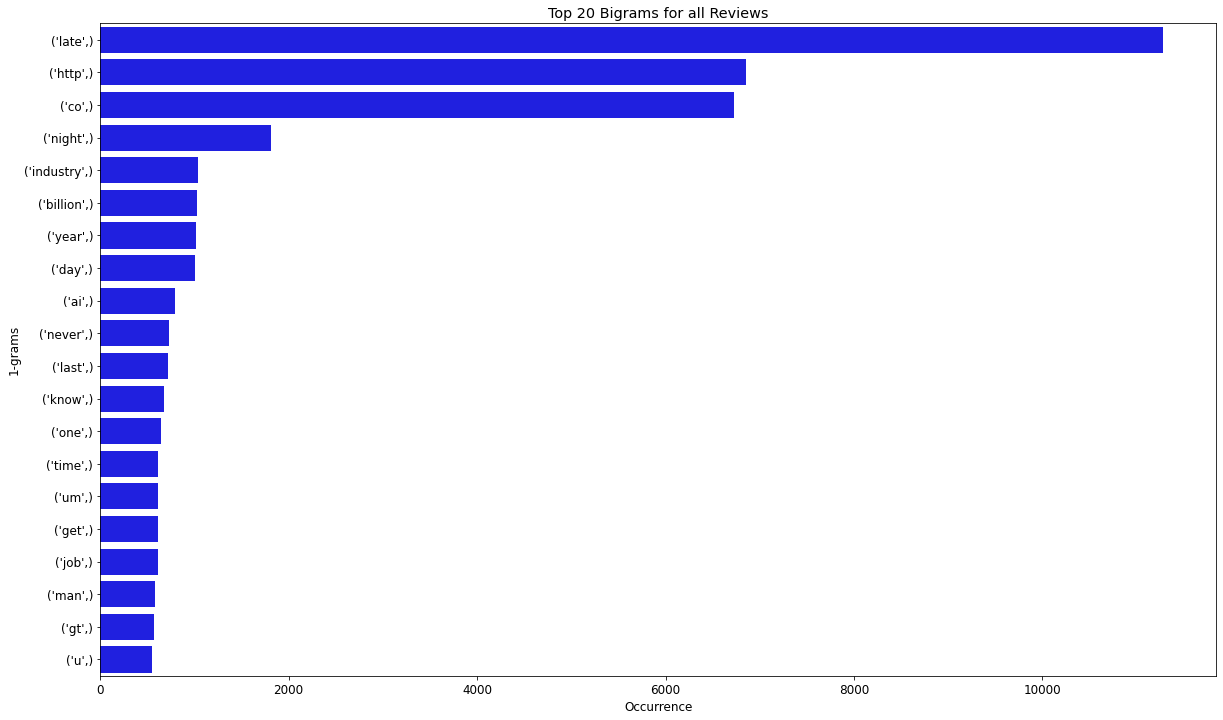

In [28]:
corpus = create_corpus(processed['text'])
create_n_grams(processed['text'], 1)

In [30]:
positive_sentiment = processed[processed['polarity'] > 0]
positive_sentiment

,text,subjectivity,polarity
13,really want take vr man prototype making c reb...,0.200000,2.000000e-01
14,latest teach tech u daily http co gwpqishg j t...,0.366667,2.333333e-01
19,hicompliance data analyst new york ny http co ...,0.454545,1.363636e-01
21,latest dataviz daily http co xke chnx thanks d...,0.366667,2.333333e-01
24,hello handle academic work free hit dm assignm...,0.400000,2.000000e-01
...,...,...,...
17027,im late omg cute fidndkdnd love ur drawing sm,0.733333,2.333333e-01
17028,daniel amartey late header earns leicester imp...,0.800000,5.000000e-02
17037,folk aragorn year old helped hobbit get rid ri...,0.400000,1.250000e-01
17038,sadly guarantee khan win entered late build fo...,0.525000,1.387779e-17


In [34]:
negative_sentiment = processed[processed['polarity'] < 0]
negative_sentiment

,text,subjectivity,polarity
3,blue nova technology llc bnt men polo black li...,0.266667,-0.083333
4,hidata engineer open location remote http co z...,0.350000,-0.050000
26,anticapitalist meetup climate crisis negative ...,0.400000,-0.300000
40,common sense guide data structure algorithm se...,0.250000,-0.150000
50,buddy posted observation made think thinking y...,0.900000,-0.500000
...,...,...,...
17031,popping late http co pxonnsthl,0.600000,-0.300000
17033,last strike job late iron man cause car pile h...,0.333333,-0.150000
17034,cant believe late get early tomorrow watch str...,0.450000,-0.100000
17035,petition protect uk dwindling hedgehog populat...,0.600000,-0.300000


In [35]:
neutral_sentiment = processed[processed['polarity'] == 0]
neutral_sentiment

,text,subjectivity,polarity
0,must unshackle ai boundary human knowledge nlp...,0.100000,0.0
1,boston dynamic robot evolution ai artificialin...,0.166667,0.0
2,intro python computer science data science lea...,0.100000,0.0
5,ultimate guide speech recognition w python rea...,1.000000,0.0
6,internet behavior http co xe kve sdc via digit...,0.000000,0.0
...,...,...,...
16945,vex said robbie tweet idk side b advice day ch...,0.000000,0.0
16946,shooting japan crammed e http co ltmelgde r,0.000000,0.0
17022,matter william need need campaign let face yes...,0.000000,0.0
17032,employed whitehall english civil servant one s...,0.000000,0.0


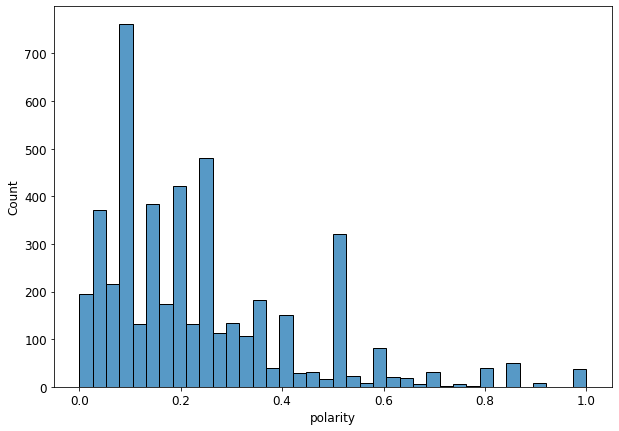

In [45]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 7)
sns.histplot(positive_sentiment['polarity'])

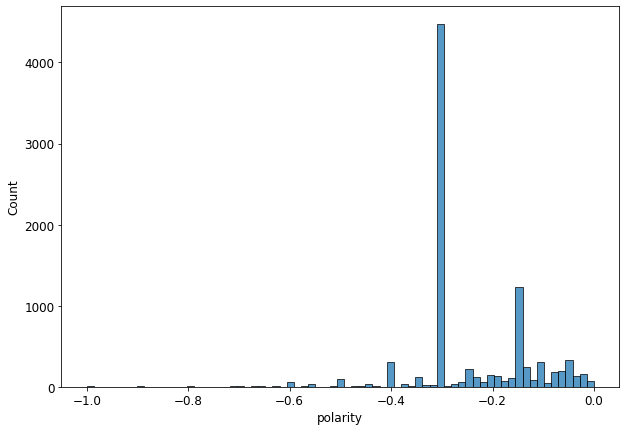

In [46]:
fig, axs = plt.subplots()
fig.set_size_inches(10, 7)
sns.histplot(negative_sentiment['polarity'])

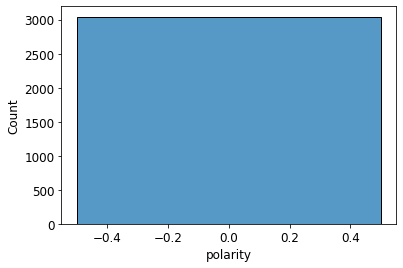